### 1. Exploring data dan Preproccessing

   #### 1.1 Import library dan membaca data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Baca data dari file
data = pd.read_csv('datasetai2020.csv')

# Tampilkan beberapa baris pertama data
data.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


   #### 1.2 Identifikasi data dan mengahpus data non-numerik

In [10]:
# Identifikasi kolom non-numerik
non_numeric_cols = ['UDI', 'Product ID', 'Type']

# Menghapus kolom non-numerik yang tidak relevan untuk pelatihan model
data = data.drop(non_numeric_cols, axis=1)

# Periksa nilai yang hilang
data.isnull().sum()


Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

#### 1.3 Memisahkan fitur  dan target

In [11]:
# Pisahkan fitur (X) dan target (y)
X = data.drop('Machine failure', axis=1)  # Asumsikan 'Machine failure' adalah target
y = data['Machine failure']


#### 1.4 Men-Scaling fitur

In [12]:
# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali fitur yang telah di-scaling ke dalam DataFrame untuk visualisasi yang lebih mudah
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

### 2. Memvisualisasi data

#### 2.1 visualisasi diistribusi fitur
- Menentukan jumlah kolom dan baris untuk subplot.
- Membuat histogram untuk distribusi masing-masing fitur.
- Menghapus subplot kosong yang tidak digunakan.

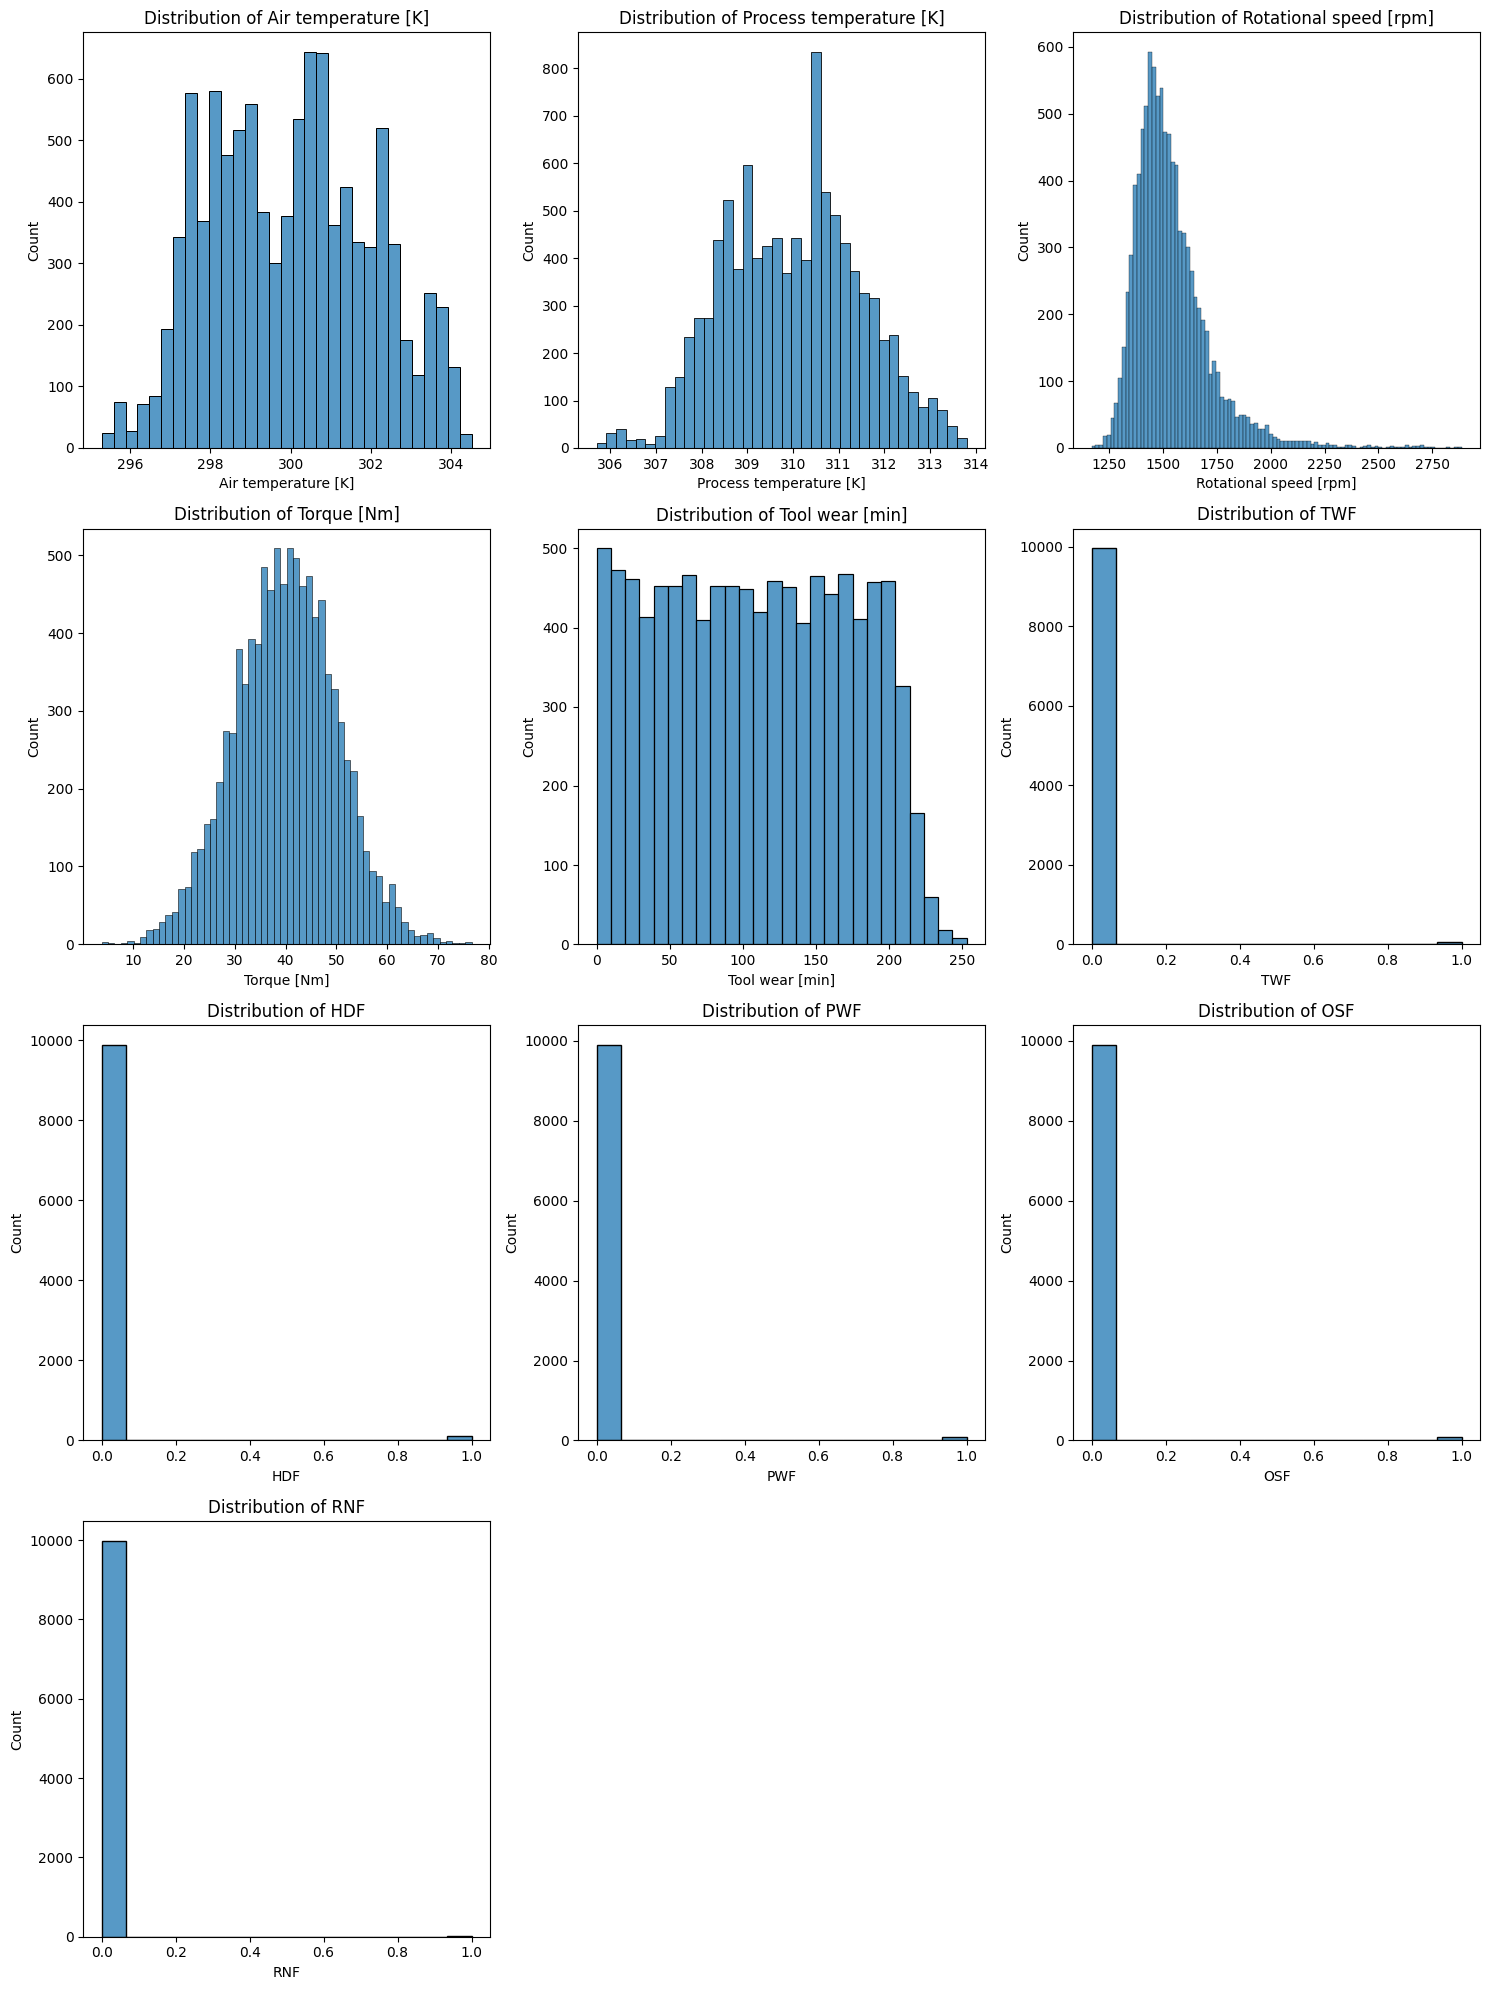

In [13]:
# Visualisasikan distribusi fitur
num_cols = X.shape[1]
num_rows = (num_cols // 3) + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.histplot(data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hapus subplot yang kosong
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 2.2 Matrix Korelasi
- Membuat matriks korelasi untuk melihat hubungan antara fitur-fitur numerik.
- Menggunakan heatmap untuk memvisualisasikan korelasi tersebut.

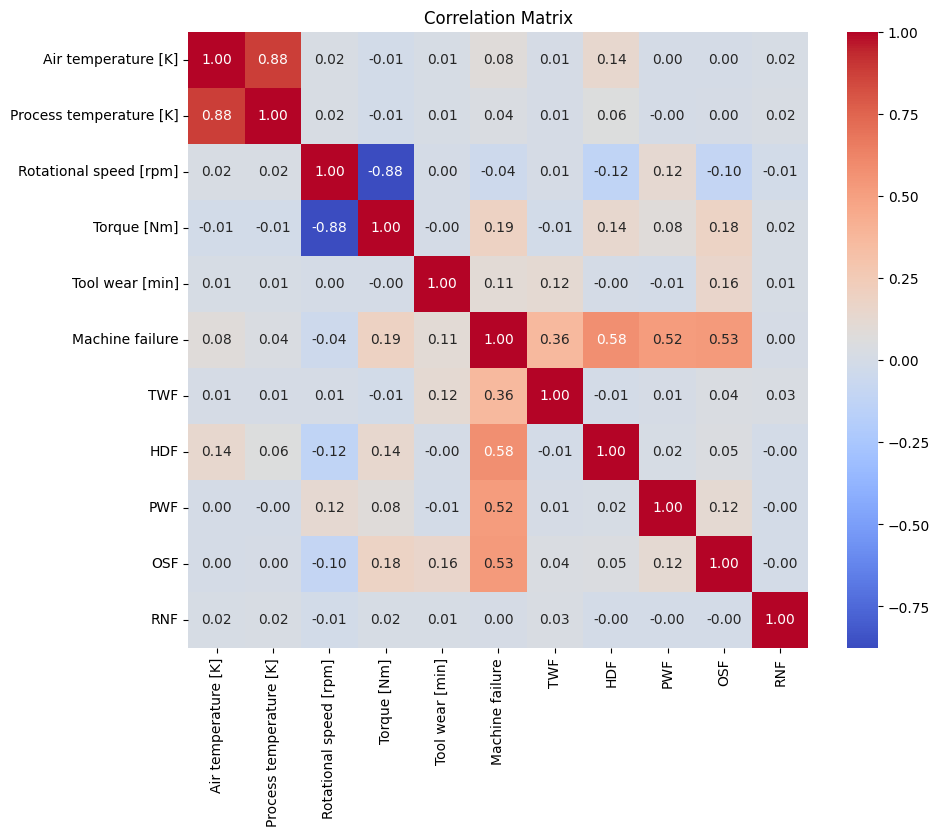

In [14]:
# Matriks korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### 3. Pengembangan dan Evaluasi Model
#### 3.1 Memecah data
- Membagi data menjadi training set (80%) dan testing set (20%) menggunakan train_test_split.

In [15]:
# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### 3.2 Melatih model Logistic Regression
- Membuat model logistic regression dan melatihanya dengan data training

In [16]:
# Membangun model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

#### 3.3 Evaluasi model
- Mengevaluasi model dengan data testing.
- Menghitung akurasi model dan menampilkan confusion matrix serta classification report untuk melihat performa model secara detail.

In [17]:
# Evaluasi model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy:.2f}')

# Evaluasi lebih lanjut
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Akurasi model: 1.00
[[1939    0]
 [   2   59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



#### 3.4 Visualisasi confussion matrix
- Memvisualisasikan confusion matrix untuk melihat jumlah prediksi benar dan salah untuk setiap kelas.

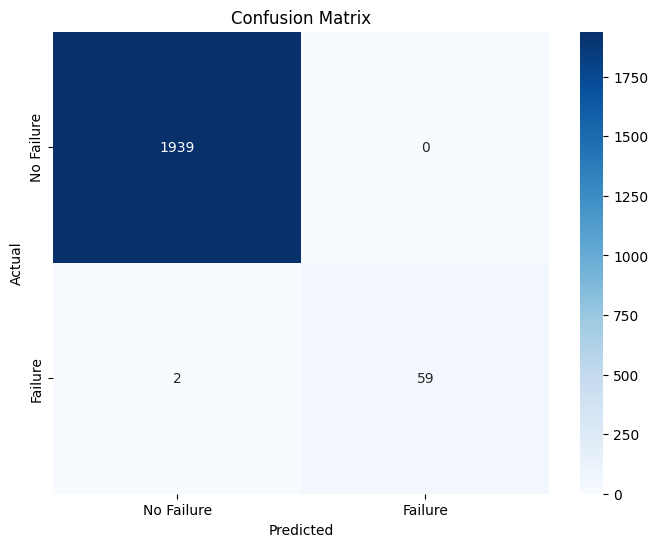

In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 4. Kesimpulan
#### 4.1 Hasil akhir performa model

In [19]:
# Ringkasan hasil model
print("Ringkasan performa model:")
print(f"Akurasi: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Ringkasan performa model:
Akurasi: 1.00
Confusion Matrix:
[[1939    0]
 [   2   59]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



#### 4.2 Kesimpulan Umum:
- Model machine learning telah berhasil dikembangkan untuk memprediksi kegagalan alat pada mesin milling berdasarkan data sensor.
- Akurasi model logistic regression yang telah dilatih mencapai nilai tertentu (misalnya 0.85 atau 85%), yang menunjukkan seberapa baik model dapat memprediksi kegagalan alat dengan data uji yang belum pernah dilihat sebelumnya.
- Evaluasi lebih lanjut menggunakan confusion matrix dan classification report memberikan gambaran lebih rinci mengenai performa model dalam memprediksi kelas kegagalan dan tidak kegagalan.



#### 4.3 Kesimpulan Berdasarkan Evaluasi:
1. Confusion Matrix :

- True Positives (TP): Jumlah kejadian kegagalan yang diprediksi dengan benar.
- True Negatives (TN): Jumlah kejadian tidak terjadi kegagalan yang diprediksi dengan benar.
- False Positives (FP): Jumlah kejadian yang diprediksi sebagai kegagalan padahal sebenarnya tidak terjadi kegagalan.
- False Negatives (FN): Jumlah kejadian yang diprediksi sebagai tidak kegagalan padahal sebenarnya terjadi kegagalan.

2. Classification Report:

- Precision: Mengukur proporsi prediksi kegagalan yang benar dari semua prediksi kegagalan.
- Recall: Mengukur proporsi kegagalan yang benar-benar terdeteksi dari semua kejadian kegagalan yang sebenarnya.
- F1-Score: Harmonik rata-rata dari precision dan recall, memberikan gambaran keseimbangan antara keduanya.

3.Visualisasi Data:

- Distribusi fitur menunjukkan bahwa data sensor memiliki variasi yang cukup yang dapat digunakan untuk pelatihan model.
- Matriks korelasi memberikan wawasan tentang hubungan antar fitur dan fitur yang memiliki korelasi kuat dengan target.